<a href="https://colab.research.google.com/github/jorgetstechnology/financas/blob/master/Fronteira_eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Obtendo a Fronteira eficiente em Python**

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
  pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1') ['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-03-24,103.269997,2447.330078
2020-03-25,100.919998,2475.560059
2020-03-26,107.379997,2630.070068
2020-03-27,110.169998,2541.469971
2020-03-30,115.000000,2626.649902


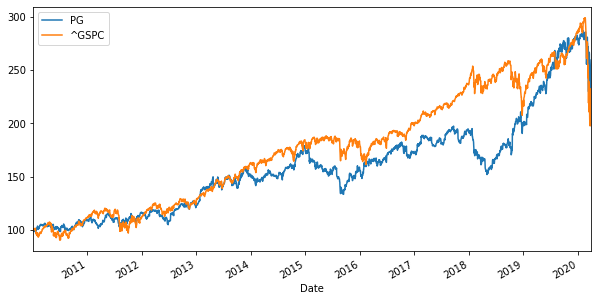

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [0]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.092465
^GSPC    0.081604
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.028494,0.017281
^GSPC,0.017281,0.029024


In [10]:
log_returns.corr() 

,PG,^GSPC
PG,1.000000,0.600907
^GSPC,0.600907,1.000000


In [0]:
num_assets = len(assets) #número de ativos na carteira

In [12]:
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.25451014, 0.05151563])

In [14]:
arr[0] + arr[1]

0.30602576371909496

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)#obtem dois pesos geados aleatoriamente, com valor = 1
weights

array([0.853776, 0.146224])

In [16]:
weights[0] + weights[1]

1.0

# `Fronteira eficiente Parte-2`

## Retorno Esperado Do Portifólio

In [17]:
np.sum(weights * log_returns.mean()) * 250 

0.0908768654623477

Variância Esperada do Portifólio

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02570569997042101

Volatilidade Esperada do Portifólio

In [20]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1603299721524987

## **`Nota`**

Não estamos considerando 1.000 investimentos diferentes

Estamos considerando 1.000 diferentes conbinações dos mesmos ativos

In [0]:
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

### `Convertendo a Lista em Array`

In [22]:
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09002864, 0.08553299, 0.08759724, 0.08762886, 0.0920317 ,
        0.08923512, 0.08634031, 0.08520239, 0.08754533, 0.08933868,
        0.08602229, 0.09000288, 0.08637211, 0.09211417, 0.0905463 ,
        0.08862542, 0.08736927, 0.08623853, 0.08501076, 0.08731462,
        0.08664503, 0.08938201, 0.09009845, 0.08848932, 0.08659516,
        0.0871239 , 0.08828784, 0.09245375, 0.08384233, 0.09086606,
        0.09093175, 0.09210297, 0.08426577, 0.08525997, 0.09025521,
        0.0837346 , 0.08556843, 0.09089258, 0.08821777, 0.08901606,
        0.08820501, 0.08949547, 0.08752467, 0.08914065, 0.08243066,
        0.08999486, 0.08581204, 0.08525054, 0.08543295, 0.08817238,
        0.08662466, 0.09048107, 0.08198411, 0.08549623, 0.09131336,
        0.08862586, 0.08515286, 0.09234465, 0.08924597, 0.08293779,
        0.09042461, 0.08739293, 0.08809902, 0.08247973, 0.09146413,
        0.09072746, 0.09076324, 0.08398819, 0.08990197, 0.08679525,
        0.08544017, 0.08685068, 0.08585966, 0.08

# ```Fronteira Eficiente Parte-3```

In [0]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [24]:
portfolios.head()

,Return,Volatility
0,0.090029,0.156903
1,0.085533,0.153401
2,0.087597,0.151836
3,0.087629,0.151854
4,0.092032,0.166241


In [25]:
portfolios.tail()

,Return,Volatility
995,0.085451,0.153574
996,0.085620,0.153226
997,0.088395,0.152689
998,0.087928,0.152091
999,0.085027,0.154603


Text(0, 0.5, 'Expected return')

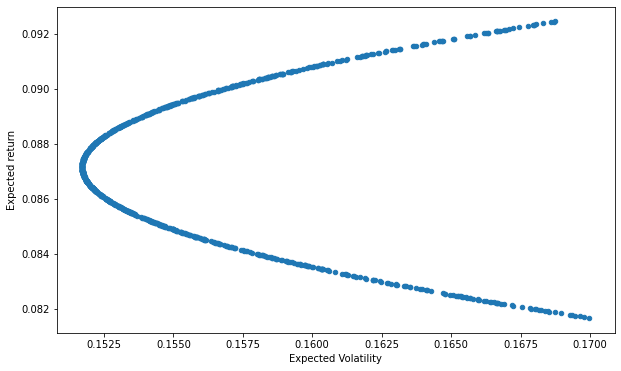

In [26]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected return')